In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lvmdrp.core.image import *
from lvmdrp.functions import imageMethod


def _parse_ccd_section(section):
    slice_x, slice_y = section.strip("[]").split(",")
    slice_x = list(map(lambda str: int(str)-1, slice_x.split(":")))
    slice_y = list(map(lambda str: int(str)-1, slice_y.split(":")))
    return slice_x, slice_y


In [5]:
raw_frame_path = "/disk-a/mejia/Research/UNAM/lvm-drp/data.sdss5.org/sas/sdsswork/data/lvm/lab/59514/sdR-s-b1-00000859.fits.gz"
ccdsec = None
positions = None
orientation = None
subtract_overscan = True
compute_error = True
gain = None
rdnoise = None


[2020 2058] [   0 2039]


0

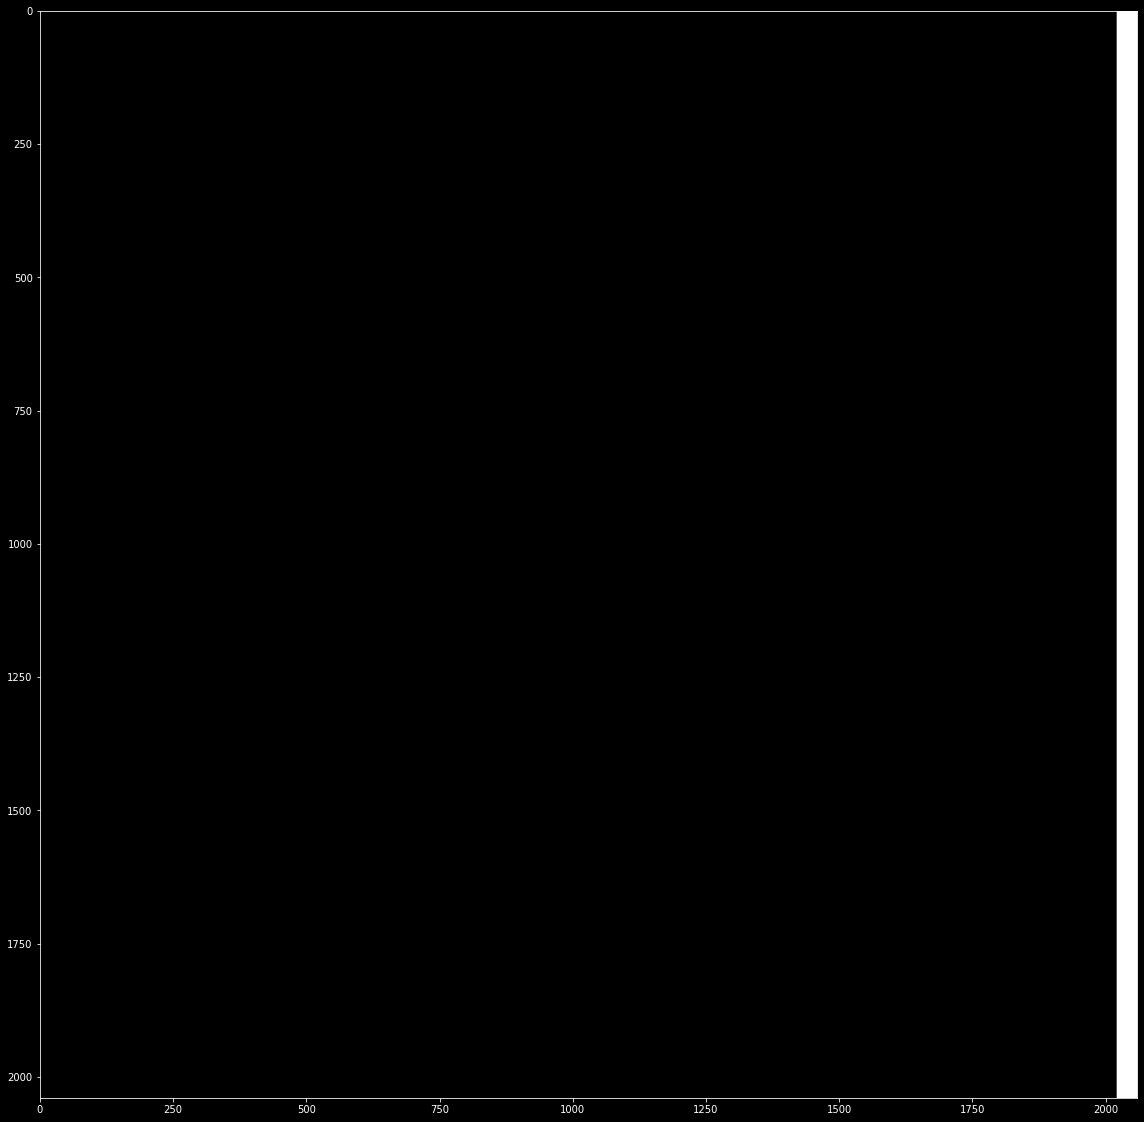

In [32]:
raw_frame = loadImage(raw_frame_path)
channel = raw_frame._header["CCD"][0]
if ccdsec is None:
    slice_x, slice_y = _parse_ccd_section(raw_frame._header["BIASSEC"])

fig, ax = plt.subplots(figsize=(20,20))

overscan_mask = np.zeros_like(raw_frame._data, dtype=bool)
overscan_mask[slice_y[0]:slice_y[1], slice_x[0]:slice_x[1]] = True
data_mask = ~overscan_mask

ab, cd = np.split(overscan_mask, 2, axis=0)
(a, b), (c, d) = np.split(ab, 2, axis=1), np.split(cd, 2, axis=1)

iy, ix = np.where(a)
print(ix[[0,-1]], iy[[0,-1]])

ax.set_aspect("equal")
ax.imshow(a, cmap="gray")
(b.sum(axis=0)>0).sum()